<a href="https://colab.research.google.com/github/dragoon-dranzer/Data_Science/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**importing libraries**

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

#**reading Data Set**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dragoon-dranzer/Data_Science/main/SNP.csv")
df.head()

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price
0,28.0,17.0,0.03963,0.0224,0.3709,0.0088,10.40
1,28.0,20.0,0.03963,0.0224,0.3709,0.0088,6.28
2,28.0,21.0,0.03963,0.0224,0.3709,0.0088,7.94
3,28.0,22.0,0.03963,0.0224,0.3709,0.0088,6.20
4,28.0,23.0,0.03963,0.0224,0.3709,0.0088,3.00


In [ ]:
df.rename(columns = {'Stock Price':'Stock_Price', 'Strike Price':'Strike_Price', 'Risk-free':'Risk_free' , 'Call Price' : 'Call_Price'}, inplace = True) 
df.head()

,Stock_Price,Strike_Price,Maturity,Dividends,Volatility,Risk_free,Call_Price
0,28.0,17.0,0.03963,0.0224,0.3709,0.0088,10.40
1,28.0,20.0,0.03963,0.0224,0.3709,0.0088,6.28
2,28.0,21.0,0.03963,0.0224,0.3709,0.0088,7.94
3,28.0,22.0,0.03963,0.0224,0.3709,0.0088,6.20
4,28.0,23.0,0.03963,0.0224,0.3709,0.0088,3.00


Before passing the prices to the deep learning net, we exploited a facet of the Black-
Scholes call option function, i.e., that the pricing function is linear homogenous in
(S;K), i.e., C(S;K) = K \ C(S=K; 1). Therefore,
C(S;K)=K = C(S=K; 1)
Accordingly, we modifed our data by dividing both stock price S and call price C by
strike price K. This normalized data was then fed into the deep learning net to t
the input variables S;K; T; q; r;  (the feature set) to the output prices C.

In [ ]:
df['Stock_Price'] = df.apply(lambda x: x['Stock_Price'] if x['Stock_Price'] < 1.0 else x['Stock_Price']/x['Strike_Price'], axis=1)

df['Call_Price'] = df.apply(lambda x: x['Call_Price'] if x['Call_Price'] < 1.0 else x['Call_Price']/x['Strike_Price'], axis=1)

df['Strike_Price'] = df.apply(lambda x: x['Strike_Price'] if x['Strike_Price'] < 1.0 else x['Strike_Price']/x['Strike_Price'], axis=1)


In [ ]:
df.head()

,Stock_Price,Strike_Price,Maturity,Dividends,Volatility,Risk_free,Call_Price
0,1.647059,1.0,0.03963,0.0224,0.3709,0.0088,0.611765
1,1.400000,1.0,0.03963,0.0224,0.3709,0.0088,0.314000
2,1.333333,1.0,0.03963,0.0224,0.3709,0.0088,0.378095
3,1.272727,1.0,0.03963,0.0224,0.3709,0.0088,0.281818
4,1.217391,1.0,0.03963,0.0224,0.3709,0.0088,0.130435


In [ ]:
df.describe()

,Stock_Price,Strike_Price,Maturity,Dividends,Volatility,Risk_free,Call_Price
count,11715.000000,11715.0,11715.000000,11715.000000,11715.000000,1.171500e+04,11715.000000
mean,1.129878,1.0,0.431389,0.006613,0.336430,8.800000e-03,0.306653
std,0.608171,0.0,0.541206,0.014786,0.085904,1.956852e-15,0.511272
min,0.000000,1.0,0.001261,0.000000,0.236600,8.800000e-03,0.000227
25%,0.866654,1.0,0.039630,0.000000,0.289500,8.800000e-03,0.030259
50%,0.990709,1.0,0.212076,0.000000,0.312800,8.800000e-03,0.142894
75%,1.256571,1.0,0.614540,0.005000,0.355800,8.800000e-03,0.409480
max,21.990000,1.0,1.879466,0.076400,0.664400,8.800000e-03,19.650000


In [ ]:
y = df['Call_Price']
X = df.drop('Call_Price', axis=1)

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state = 27)

In [ ]:
X_train.describe()

,Stock_Price,Strike_Price,Maturity,Dividends,Volatility,Risk_free
count,9372.000000,9372.0,9372.000000,9372.000000,9372.000000,9.372000e+03
mean,1.130359,1.0,0.437384,0.006527,0.336302,8.800000e-03
std,0.619121,0.0,0.545722,0.014647,0.085476,8.708776e-16
min,0.000000,1.0,0.001261,0.000000,0.236600,8.800000e-03
25%,0.866654,1.0,0.039630,0.000000,0.289500,8.800000e-03
50%,0.990370,1.0,0.212076,0.000000,0.312800,8.800000e-03
75%,1.258353,1.0,0.614557,0.005000,0.355800,8.800000e-03
max,21.990000,1.0,1.879466,0.076400,0.664400,8.800000e-03


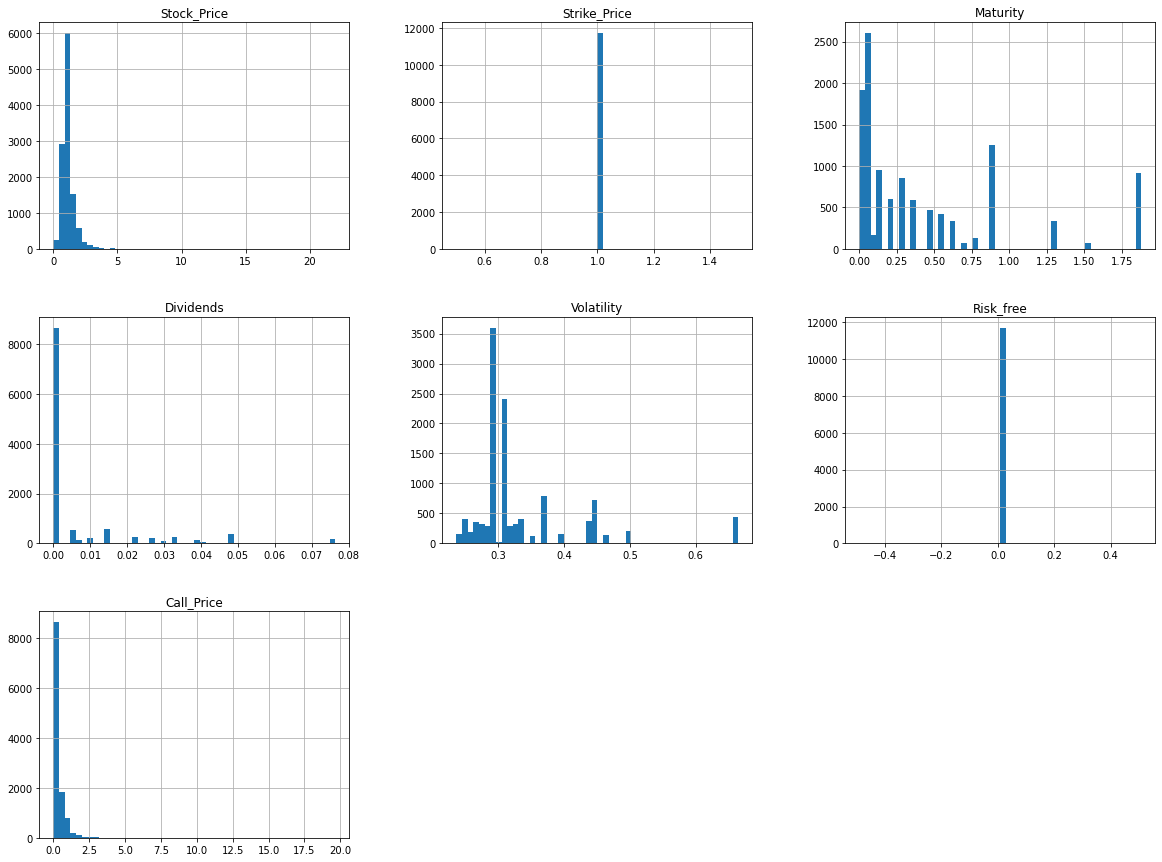

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50 , figsize = (20,15))
plt.show()

In [ ]:

mlp = MLPRegressor(hidden_layer_sizes=(100,100,100,100), solver = 'adam' ,
                     shuffle = False, batch_size=64, verbose=True,
                   max_iter= 1000
                    )

In [ ]:
 mlp.fit(X_train,y_train)
 y_pred = mlp.predict(X_test)

Iteration 1, loss = 0.03784968
Iteration 2, loss = 0.02354594
Iteration 3, loss = 0.02282604
Iteration 4, loss = 0.02238767
Iteration 5, loss = 0.02203716
Iteration 6, loss = 0.02172634
Iteration 7, loss = 0.02154965
Iteration 8, loss = 0.02120805
Iteration 9, loss = 0.02103878
Iteration 10, loss = 0.02094326
Iteration 11, loss = 0.02082502
Iteration 12, loss = 0.02070104
Iteration 13, loss = 0.02056638
Iteration 14, loss = 0.02048230
Iteration 15, loss = 0.02032346
Iteration 16, loss = 0.02025666
Iteration 17, loss = 0.02014636
Iteration 18, loss = 0.02010572
Iteration 19, loss = 0.01997713
Iteration 20, loss = 0.01993531
Iteration 21, loss = 0.01984233
Iteration 22, loss = 0.01980090
Iteration 23, loss = 0.01972430
Iteration 24, loss = 0.01964069
Iteration 25, loss = 0.01962542
Iteration 26, loss = 0.01959532
Iteration 27, loss = 0.01945169
Iteration 28, loss = 0.01952004
Iteration 29, loss = 0.01939755
Iteration 30, loss = 0.01936061
Iteration 31, loss = 0.01931757
Iteration 32, los

#**Evaluation Metrics**

In [ ]:
from sklearn import metrics 

mae = metrics.mean_absolute_error(y_train,mlp.predict(X_train))
mse = metrics.mean_squared_error(y_train,mlp.predict(X_train))
r2 = metrics.r2_score(y_train,mlp.predict(X_train))
rmse = np.sqrt(mse) # or mse**(0.5)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.0943622668904747
MSE: 0.03678565668662867
RMSE: 0.19179587244419175
R-Squared: 0.8662160247576486


In [ ]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.866216
Test set score: 0.782301


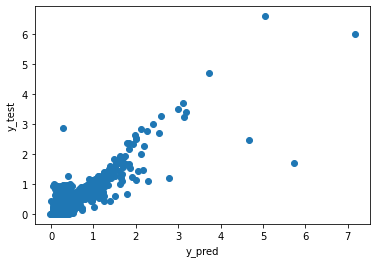

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test) 

plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show() 

#**COMMPARING**

**tanh :**
      
      Training set score: 0.833441

      Test set score: 0.718982 
0.12019009565725952 0.0501693811154518 0.8175414048401803


**loogistic :**
            
            Training set score: 0.833032

             Test set score: 0.721136

0.1297673532346836 0.04590990885318426 0.8330324734524696


**none:**

         Training set score: 0.864921
          
          Test set score: 0.778331

0.09872406519158956 0.03714183391137499 0.8649206610395755